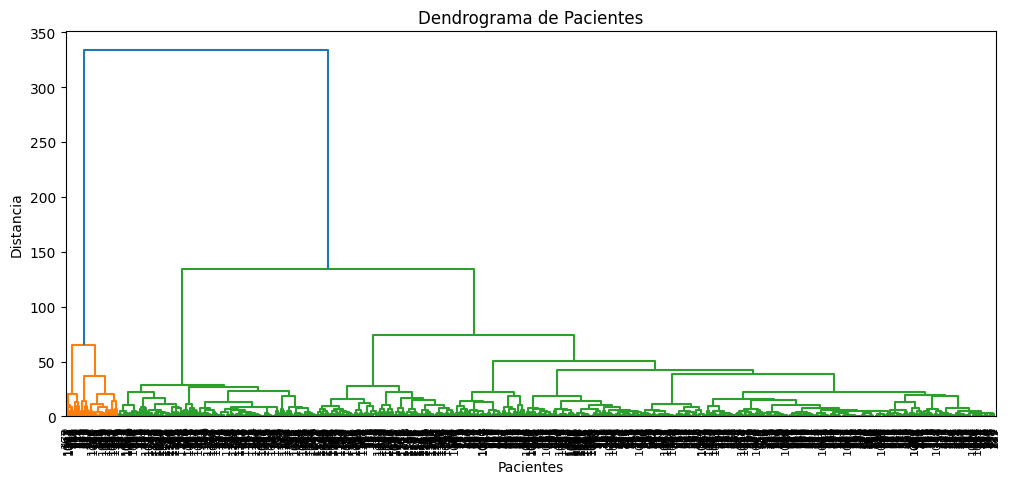

Cluster
4    671
2    246
3    170
1     65
Name: count, dtype: int64


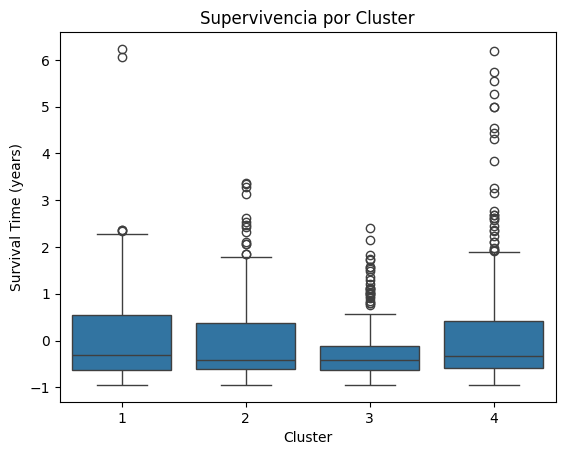

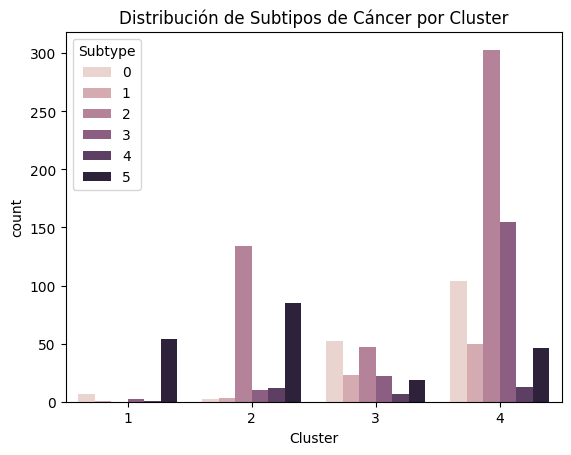

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Cargar datos
data = pd.read_excel("MetaData.xlsx")
df = pd.DataFrame(data)

# Eliminar columnas irrelevantes
df = df.drop(df.columns[[0, -1, 10, 11]], axis=1)

#Eliminar filas con NaN en 'Survival Time (years)'
df = df.dropna(subset=["Survival Time (years)"], axis=0)

# Identificar variables numéricas y categóricas
numeric_vars = ["Age at Diagnosis", "Survival Time (years)"]
categorical_vars = ["Sex", "Race", "Definition", "Menopausal Status", "Cancer Type",
                    "ER", "PR", "HER2", "Survival Status", "Subtype", "Genetic Ancestry"]

#Codificar variables categóricas con LabelEncoder
label_encoders = {}
for col in categorical_vars:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Convertir a string antes de codificar
    label_encoders[col] = le  # Guardamos para referencia

#  Normalizar datos numéricos
scaler = StandardScaler()
df[numeric_vars] = scaler.fit_transform(df[numeric_vars])

# Aplicar clustering jerárquico
Z = linkage(df[numeric_vars + categorical_vars], method="ward")

# Dibujar dendrograma
plt.figure(figsize=(12, 5))
dendrogram(Z, labels=df.index, leaf_rotation=90, leaf_font_size=8)
plt.title("Dendrograma de Pacientes")
plt.xlabel("Pacientes")
plt.ylabel("Distancia")
plt.show()

# Crear clusters a partir del dendrograma
num_clusters = 4  # Ajusta según el dendrograma
df["Cluster"] = fcluster(Z, num_clusters, criterion="maxclust")

# Mostrar distribución de los clusters
print(df["Cluster"].value_counts())

# Visualizar relación entre clusters y variables clave
sns.boxplot(x="Cluster", y="Survival Time (years)", data=df)
plt.title("Supervivencia por Cluster")
plt.show()

sns.countplot(x="Cluster", hue="Subtype", data=df)
plt.title("Distribución de Subtipos de Cáncer por Cluster")
plt.show()
